In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import math

In [2]:
def cv_show(im,msg):
    cv2.imshow(msg,im)
    cv2.waitKey(0)
    cv2.destroyAllWindows()	

In [3]:
def plt_show(im):
    plt.axis("off")
    plt.imshow(im, cmap="gray")
    plt.show()
    

In [4]:
def hist_img_v0(f):
    m, n = f.shape
    h = [0.0] * 256
    for i in range(m):
        for j in range(n):
            h[f[i, j]]+=1
    return np.array(h, dtype='uint16')

In [5]:
def otsu(hist, st, en):
    prob = np.zeros_like(hist, dtype='float16')
    tot = np.sum(hist[st:en])
    prob[st:en] = hist[st:en]/tot
    coef_max = -1
    thr = -1
    for t in range(st+1,en-1):
        w0 = np.sum(prob[st:t]) + 0.00000001
        w1 = np.sum(prob[t:en]) + 0.00000001
        i0 = np.array([i for i in range(st, t)])
        i1 = np.array([i for i in range(t, en)])
        u0 = np.sum(i0*prob[st:t])/w0
        u1 = np.sum(i1*prob[t:en])/w1

        coef = (w0*w1)*np.power(u0-u1,2)
        if  coef > coef_max:
            coef_max = coef
            thr = t
    return thr

In [6]:
img = cv2.imread("./images/gray2.png", 0)

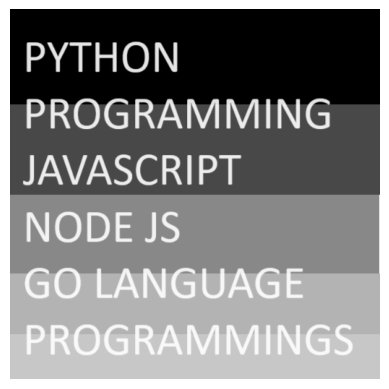

In [7]:
plt_show(img)

In [8]:
hist = hist_img_v0(img)

In [9]:
#plt.plot(hist)
#plt.savefig('./outs/graph_org.jpg')

In [10]:
st,en = 0,256
T = []
for t in range(3):
    thr = otsu(hist,st,en)
    T.append(thr)
    st = thr+1
print(T, thr)

[161, 203, 229] 229


In [11]:
out = np.zeros_like(img)
out[img <= thr ] = 0
out[img > thr] = 255

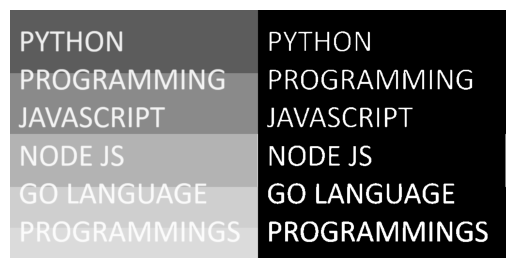

In [12]:
imgs = cv2.hconcat([img, out])
plt_show(imgs)